Success rate: 0.4085
Final Q-Table Values
LEFT DOWN RIGHT UP
[[1.32691346e-02 1.58238036e-02 6.41022194e-01 2.32412204e-02]
 [1.64573243e-03 2.52335000e-04 2.82516125e-03 1.86160167e-01]
 [2.55325542e-03 1.42710179e-02 1.65358013e-02 1.32252972e-01]
 [1.13470089e-02 2.43940394e-04 1.96692729e-04 9.74685349e-02]
 [7.18882997e-01 2.48103706e-04 3.39887139e-05 1.39686644e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.59029069e-06 3.09823101e-08 1.37816248e-04 1.23354838e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.29066763e-03 4.94516025e-03 5.11872715e-03 2.99611930e-01]
 [5.04018606e-03 7.54938123e-01 5.06231992e-04 5.18371259e-03]
 [8.77528568e-02 6.71507667e-04 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.52788636e-03 0.00000000e+00 8.16322268e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.26680883e-01 0.00000000

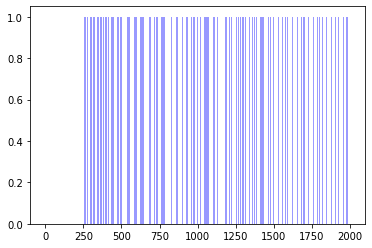

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('FrozenLake-v0')
 
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
learning_rate = .85
dis = .99
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done:
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))

        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)

        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = (1-learning_rate) * Q[state, action] \
            + learning_rate*(reward + dis * np.max(Q[new_state, :]))

        rAll += reward
        state = new_state

    rList.append(rAll)
print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color='b', alpha=0.4)
plt.show()